# Credit Card Fraud Detection

## Introduction

The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

When we make any transaction while purchasing any product online - a good amount of people prefer credit cards. The credit limit in credit cards sometimes helps us me making purchases even if we don’t have the amount at that time. but, on the other hand, these features are misused by cyber attackers.

Today, we have many machine learning algorithms that can help us classify abnormal transactions. The only requirement is the past data and the suitable algorithm that can fit our data in a better form.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

As mentioned above there are 284807 number of rows and 31 number of columns in a dataframe.

### Data Analysis

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

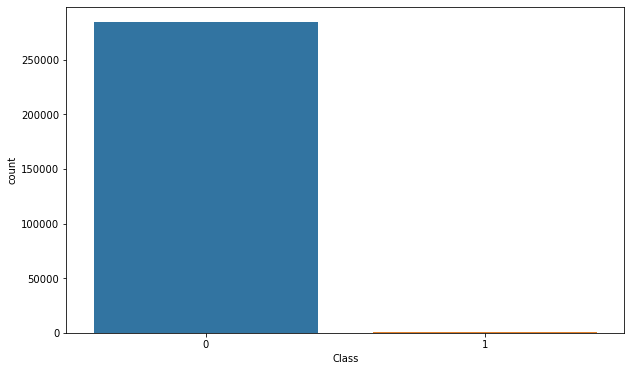

In [6]:
sns.countplot(data.Class)

<AxesSubplot:>

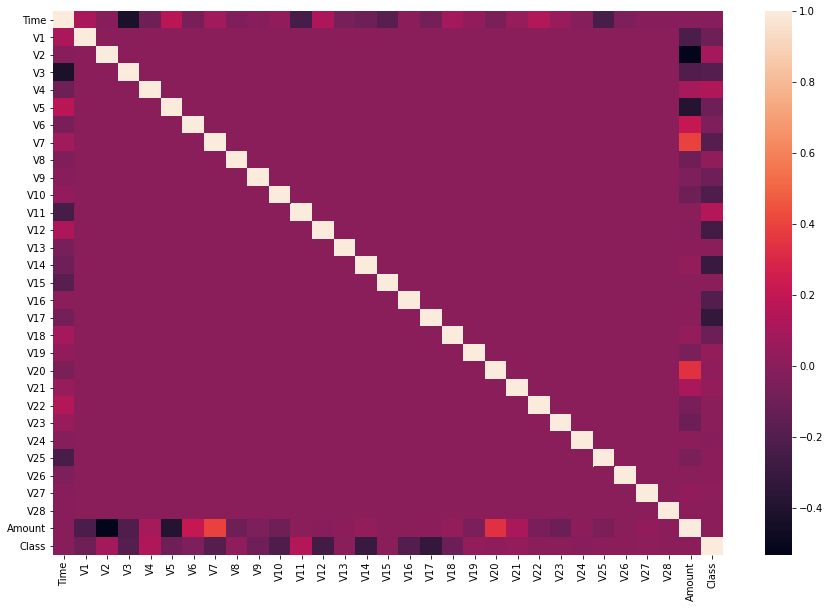

In [7]:
#Getting the relationship between variables using correlation method
data_corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr)

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.

In [28]:
data_corr['Class'].sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [8]:
#Distinguishing fraudlent and non-fraudlent data

normal = data[data.Class == 0]
fraudlent = data[data.Class == 1]
print("Shape of normal transaction: {}".format(normal.shape))
print("Shape of fraudlent transaction: {}".format(fraudlent.shape))

Shape of normal transaction: (284315, 31)
Shape of fraudlent transaction: (492, 31)


So basically there are total 492 number of fraudlent transactions which are there in the dataframe. We will now take sample of 492 normal transactions.

In [9]:
print("Amount details of the fraudulent transaction")
fraudlent.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
print("Amount details of the Normal transaction")
normal.Amount.describe()

Amount details of the Normal transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# Separating X and Y values

X = data.drop(['Class'], axis=1)
y = data['Class']
print(X.shape)
print(y.shape)

X_data = X.values
y_data = y.values

(284807, 30)
(284807,)


In [29]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Splitting Dataset into Train and Test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print("Shape of X_train data: ",X_train.shape)
print("Shape of X_test data: ",X_test.shape)

Shape of X_train data:  (227845, 30)
Shape of X_test data:  (56962, 30)


### Building model

### Model Training & Evaluation

#### 1. Random Forest

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_pred = rfc.predict(X_test)
print('Accuracy score of the Random Forest model is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy score of the Random Forest model is: 0.9995435553526912


In [15]:
print('F1 score of the Random Forest model is: {}'.format(f1_score(y_test, y_pred)))

F1 score of the Random Forest model is: 0.8505747126436782


In [16]:
print('Precision score of the Random Forest model is: {}'.format(precision_score(y_test, y_pred)))

Precision score of the Random Forest model is: 0.9736842105263158


#### Visualizing Confusion Matrix

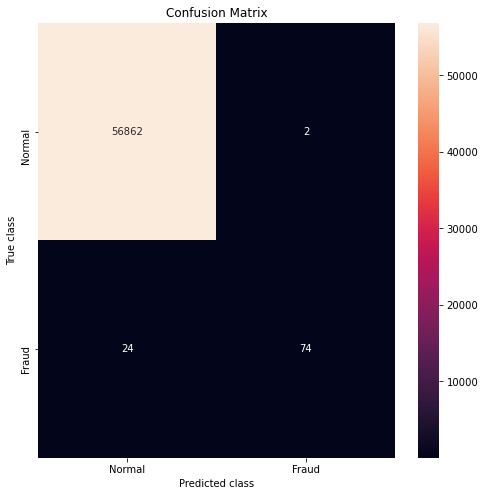

In [17]:
Labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(conf_matrix, annot=True, xticklabels=Labels, yticklabels=Labels, fmt='d')
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### 2. K-Nearest Neighbors

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [19]:
print('Accuracy score of the K-Nearest Neighbors model is: {}'.format(accuracy_score(y_test, knn_pred)))
print('f1 score of the K-Nearest Neighbors model is: {}'.format(f1_score(y_test, knn_pred)))
print('Precision score of the K-Nearest Neighbors model is: {}'.format(precision_score(y_test, knn_pred)))

Accuracy score of the K-Nearest Neighbors model is: 0.9983673326077034
f1 score of the K-Nearest Neighbors model is: 0.09708737864077671
Precision score of the K-Nearest Neighbors model is: 1.0


#### 3. Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [21]:
print('Accuracy score of the Logistic Regression model is: {}'.format(accuracy_score(y_test, lr_pred)))
print('f1 score of the Logistic Regression model is: {}'.format(f1_score(y_test, lr_pred)))
print('Precision score of the Logistic Regression model is: {}'.format(precision_score(y_test, lr_pred)))

Accuracy score of the Logistic Regression model is: 0.9986306660580738
f1 score of the Logistic Regression model is: 0.5851063829787235
Precision score of the Logistic Regression model is: 0.6111111111111112


#### 4. XGBoost

In [22]:
xgb = XGBClassifier(max_depth = 4, eval_metric = 'mlogloss')
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [23]:
print('Accuracy score of the XGBoost model is: {}'.format(accuracy_score(y_test, xgb_yhat)))
print('f1 score of the XGBoost model is: {}'.format(f1_score(y_test, xgb_yhat)))
print('Precision score of the XGBoost model is: {}'.format(precision_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is: 0.9995962220427653
f1 score of the XGBoost model is: 0.871508379888268
Precision score of the XGBoost model is: 0.9629629629629629


#### 5. Decision Tree

In [24]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)

In [25]:
print('Accuracy score of the Decision Tree model is: {}'.format(accuracy_score(y_test, dt_pred)))
print('f1 score of the Decision Tree model is: {}'.format(f1_score(y_test, dt_pred)))
print('Precision score of the Decision Tree model is: {}'.format(precision_score(y_test, dt_pred)))

Accuracy score of the Decision Tree model is: 0.9994557775359011
f1 score of the Decision Tree model is: 0.8359788359788359
Precision score of the Decision Tree model is: 0.8681318681318682


## Conclusion

We just received 99.95% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that our model is not overfitted.

Finally, based on our accuracy score XGBoost is the winner for our case. The only catch here is the data that we have received for model training.